In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product C,Anti-Ulcer,January,2019,496334,1002744,1578266,1
2019-02-01,Product C,Anti-Ulcer,February,2019,306455,619142,974480,2
2019-03-01,Product C,Anti-Ulcer,March,2019,476270,962208,1514466,3
2019-04-01,Product C,Anti-Ulcer,April,2019,628463,1269687,1998416,4
2019-05-01,Product C,Anti-Ulcer,May,2019,366750,740950,1166209,5
2019-06-01,Product C,Anti-Ulcer,June,2019,352324,711811,1120336,6
2019-07-01,Product C,Anti-Ulcer,July,2019,657300,1327952,2090113,7
2019-08-01,Product C,Anti-Ulcer,August,2019,429552,867822,1365910,8
2019-09-01,Product C,Anti-Ulcer,September,2019,499906,1009971,1589625,9


In [4]:
sales_c= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_c.shape

(60, 3)

In [6]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_c['Sales'].sum())
print('Total Market Size:',sales_c['Market Size'].sum())
print('Total Marketing Expense:', sales_c['Marketing Expense'].sum())

Total Sales: 45599092
Total Market Size: 75798227
Total Marketing Expense: 33224968


Text(0.5, 1.0, 'Product C')

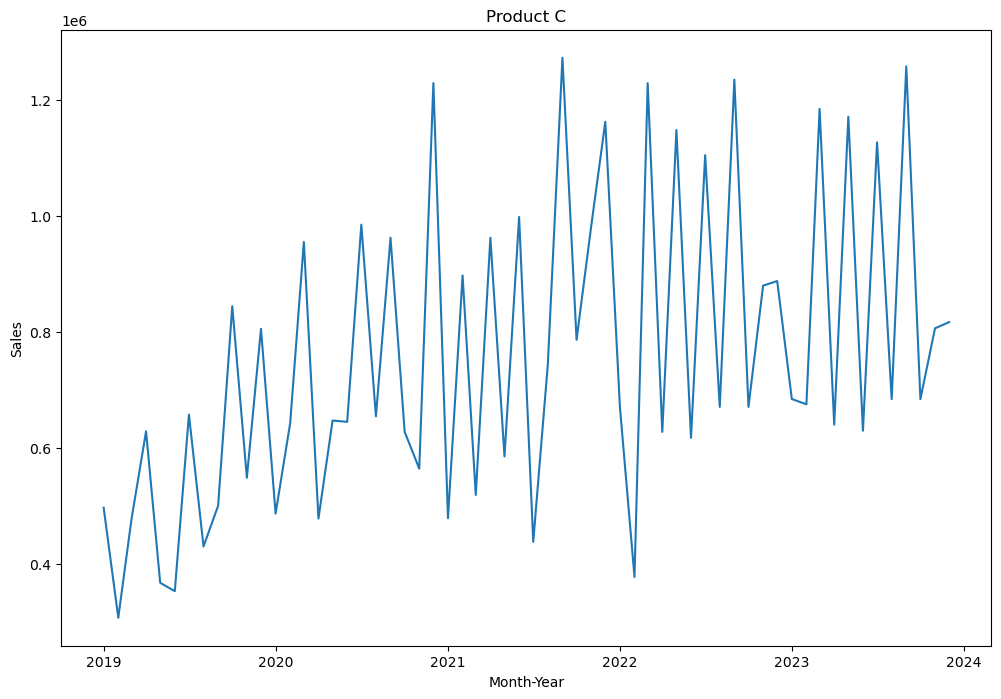

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c['Sales'])
plt.title('Product C')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_c['Sales'])

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


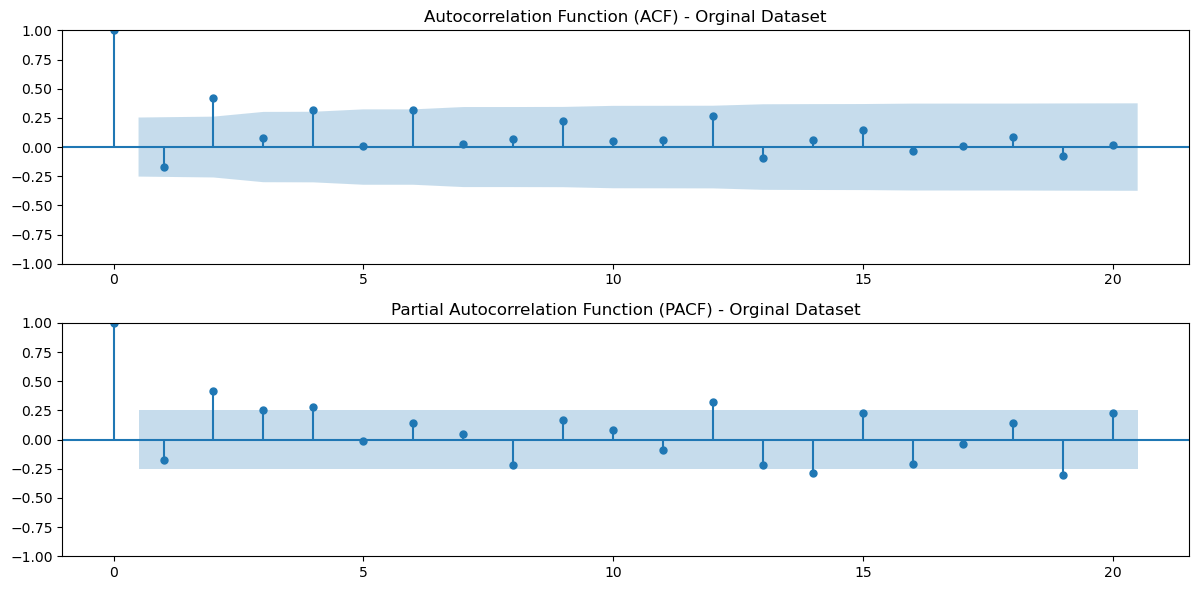

In [12]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [13]:
train= sales_c[:54]
test=sales_c[54:]

In [14]:
print(len(train), len(test))

54 6


In [15]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [16]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [17]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [18]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [19]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse           rmse
1   0  1  1421.857533  1431.802453  84825.658759  1.011229e+10  100559.891179
4   1  1  1423.719707  1435.653611  82650.794539  9.720696e+09   98593.589952
2   0  2  1423.824048  1435.757952  81750.973259  9.527975e+09   97611.344674
7   2  1  1425.048018  1438.970906  83731.424025  9.507930e+09   97508.613807
6   2  0  1425.570082  1437.503986  77741.883462  8.631441e+09   92905.550937
9   3  0  1425.681212  1439.604101  79332.646899  8.582210e+09   92640.215484
5   1  2  1425.830659  1439.753547  81570.143963  9.480330e+09   97366.988597
10  3  1  1427.044603  1442.956476  83394.948320  9.417161e+09   97042.055479
12  4  0  1427.069618  1442.981490  81075.638506  8.949231e+09   94600.376892
8   2  2  1427.206713  1443.118585  83464.958835  9.439502e+09   97157.100669
15  5  0  1428.926905  1446.827761  82449.588922  9.173719e+09   95779.532342
13  4  1  1429.032245  1446.933101  83430.710168  9.433672e+09  

In [20]:
m_arima= ARIMA(train['Sales'], order=(0,0,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   54
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -705.929
Date:                Thu, 09 May 2024   AIC                           1421.858
Time:                        16:23:23   BIC                           1431.802
Sample:                    01-01-2019   HQIC                          1425.693
                         - 06-01-2023                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.713e+05   4.56e+04      3.753      0.000    8.18e+04    2.61e+05
Market Size           0.5223      0.033     15.776      0.000       0.457       0.587
Marketing Expense    -0.

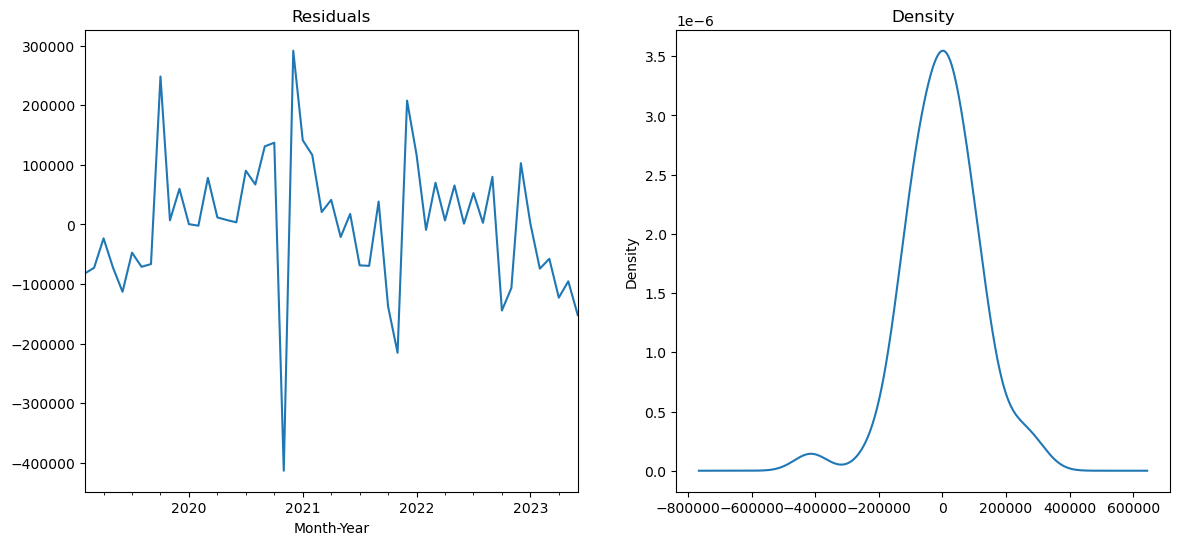

In [21]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

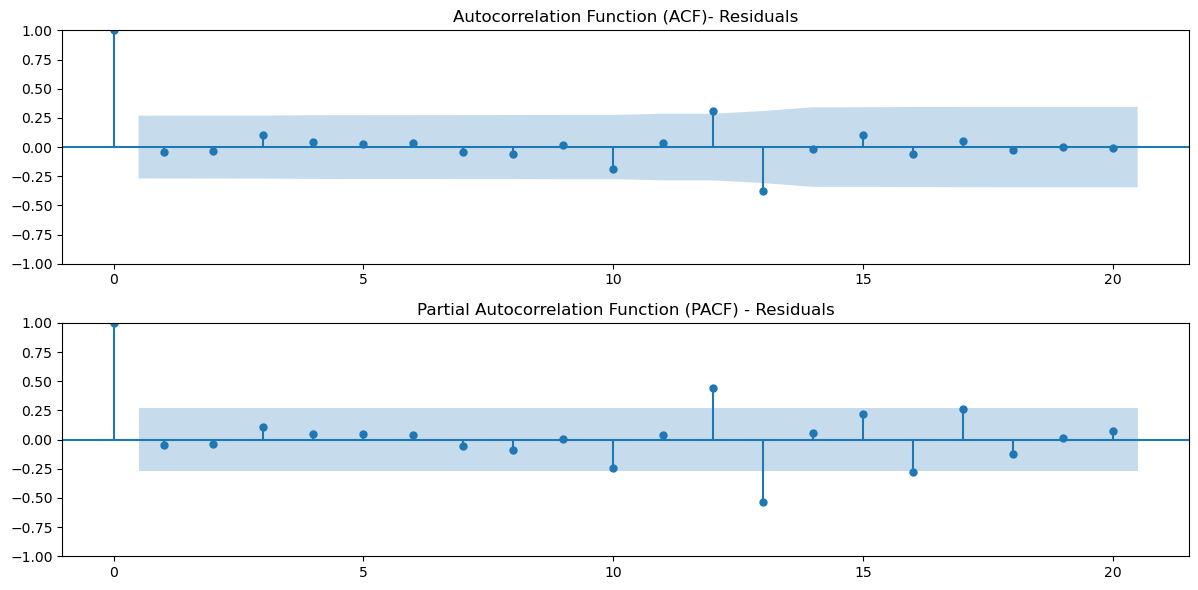

In [22]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

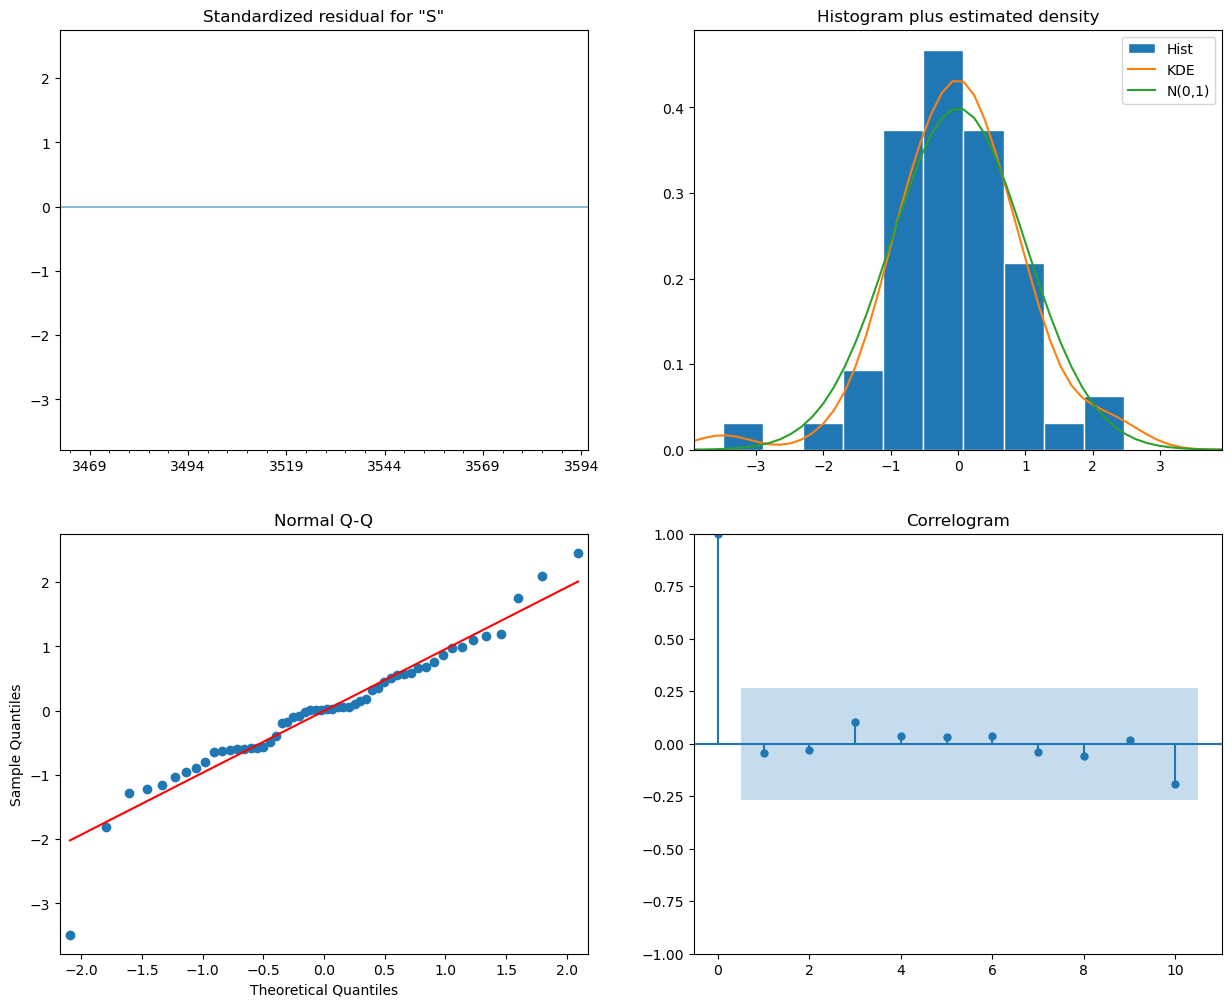

In [23]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [24]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [25]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [26]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_c['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [27]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

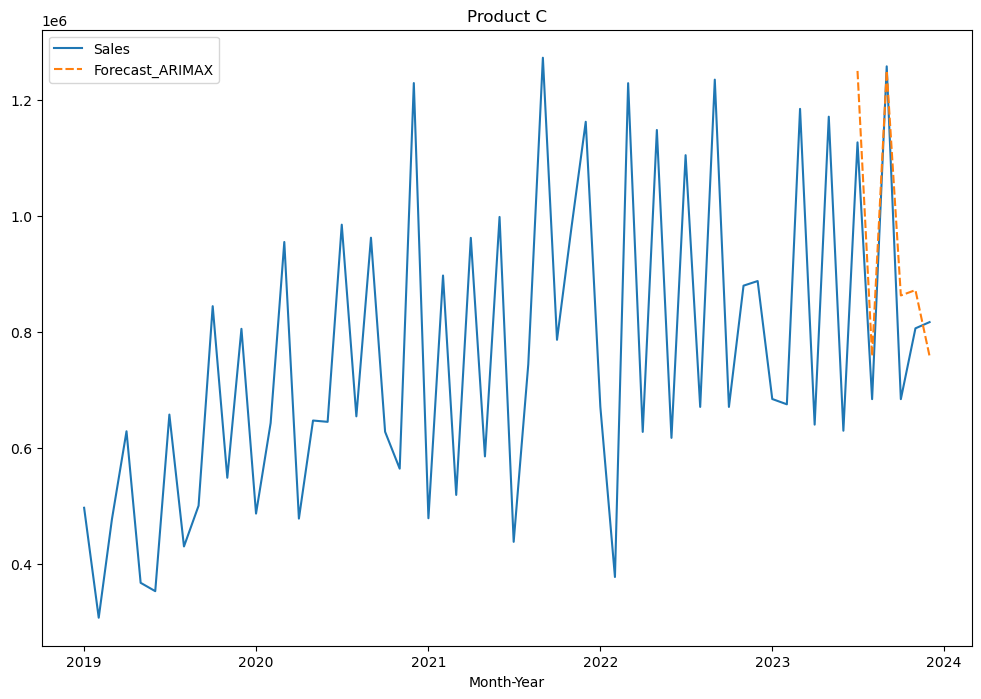

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX']])
plt.title('Product C')
plt.show()

In [29]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 84825.65875880416
MAPE - ARIMAX: 0.10659773914253162
MSE - ARIMAX: 10112291713.935379
RMSE - ARIMAX: 100559.8911790152


# SARIMA

In [30]:
import statsmodels.api as sm

In [31]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_c['Sales'], label='Original Series')
#axes[0].plot(sales_c['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_c['Sales'], label='Original Series')
#axes[1].plot(sales_c['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product C', fontsize=16)
#plt.show()

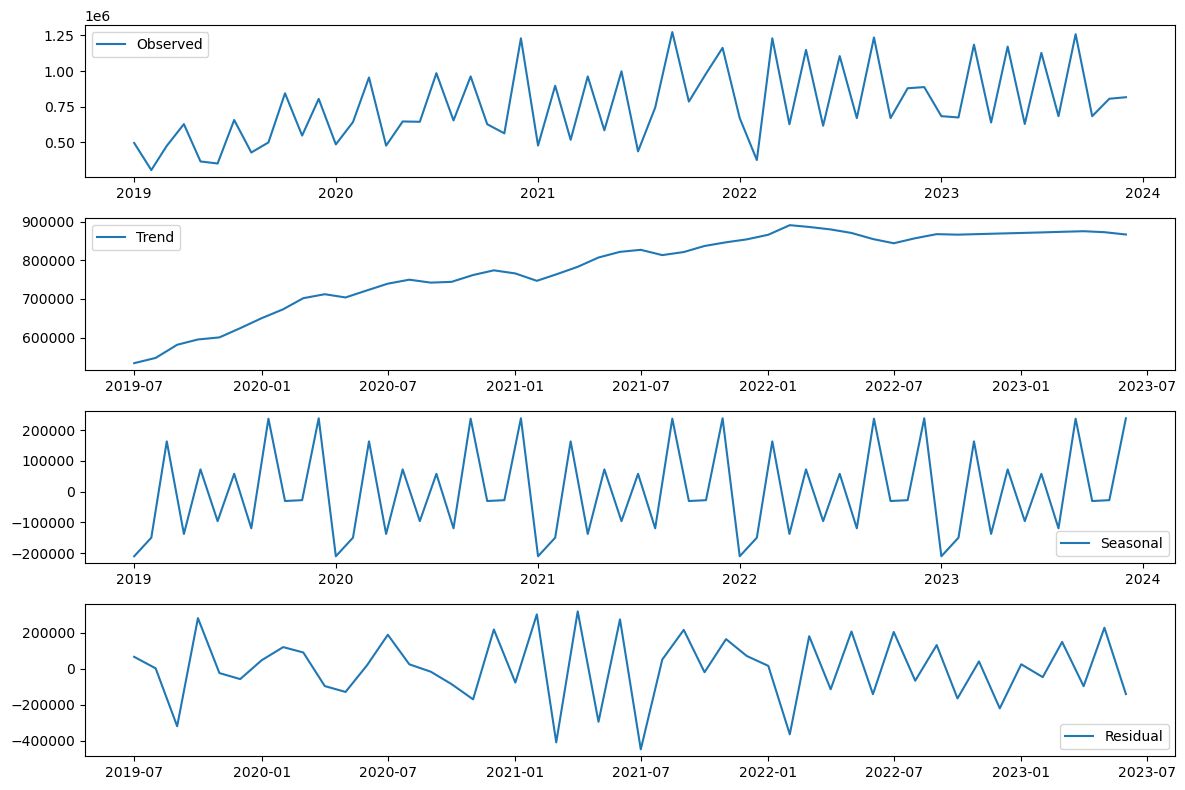

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

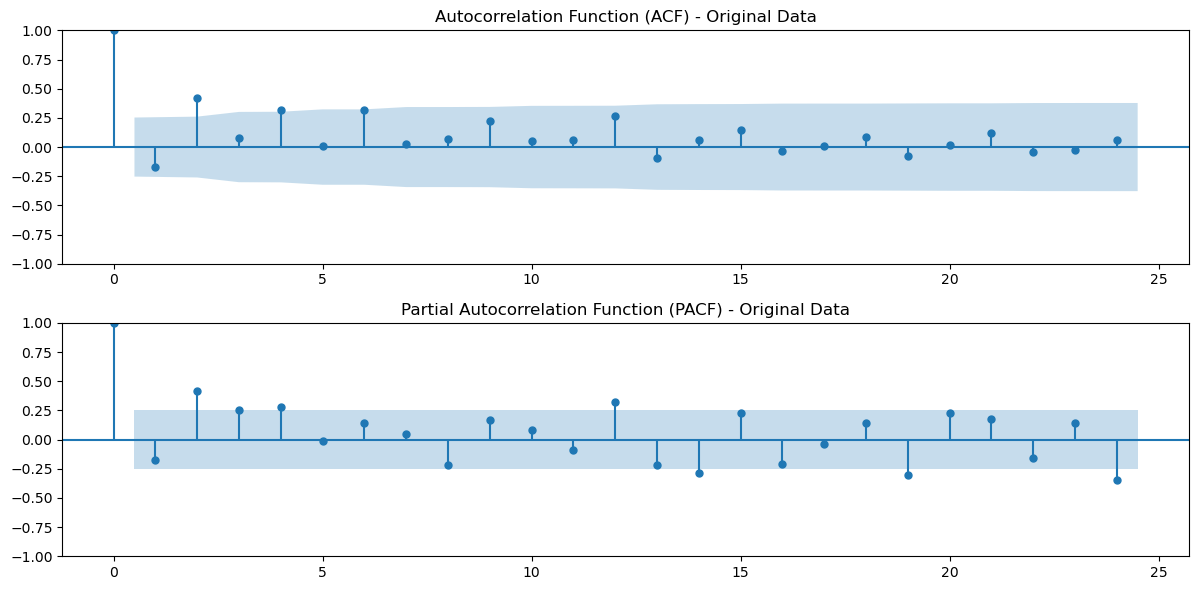

In [33]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [34]:
# Plot ACF and PACF
#plt.figure(figsize=(12, 6))
#plt.subplot(211)
#plot_acf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

#plt.subplot(212)
#plot_pacf(sales_b['Sales'].diff(12).dropna(), lags=22, ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

#plt.tight_layout()
#plt.show()

In [35]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 0, 1), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [36]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
1   0  1  1432.082999  1442.027919   82959.155598  8.959172e+09
3   1  0  1432.480517  1442.425437   74173.192729  6.720550e+09
6   2  0  1432.733134  1444.667038   97263.930043  1.039456e+10
2   0  2  1433.243800  1445.177704   83260.288712  7.949976e+09
9   3  0  1433.334408  1447.257296  128159.224570  2.246237e+10
4   1  1  1433.587824  1445.521728   77921.473171  7.774941e+09
7   2  1  1433.866354  1447.789243  110363.233442  1.420321e+10
5   1  2  1435.081571  1449.004459   91532.511338  9.181926e+09
12  4  0  1435.333915  1451.245787  128515.593574  2.256933e+10
10  3  1  1435.333971  1451.245843  128682.214941  2.263839e+10
8   2  2  1435.497759  1451.409632  121191.250635  1.890365e+10
13  4  1  1437.334227  1455.235083  128454.672894  2.258471e+10
11  3  2  1437.361461  1455.262318  128449.924753  2.236791e+10
14  4  2  1439.334041  1459.223882  128561.551056  2.257998e+10
0   0  0  1439.996239  1447.952176  1112

In [37]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 0, 1),seasonal_order=(0,0,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   54
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -711.041
Date:                            Thu, 09 May 2024   AIC                           1432.083
Time:                                    16:25:05   BIC                           1442.028
Sample:                                01-01-2019   HQIC                          1435.918
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.6472      0.017     37.138      0.000       0.613       0.681
Marketing Expe

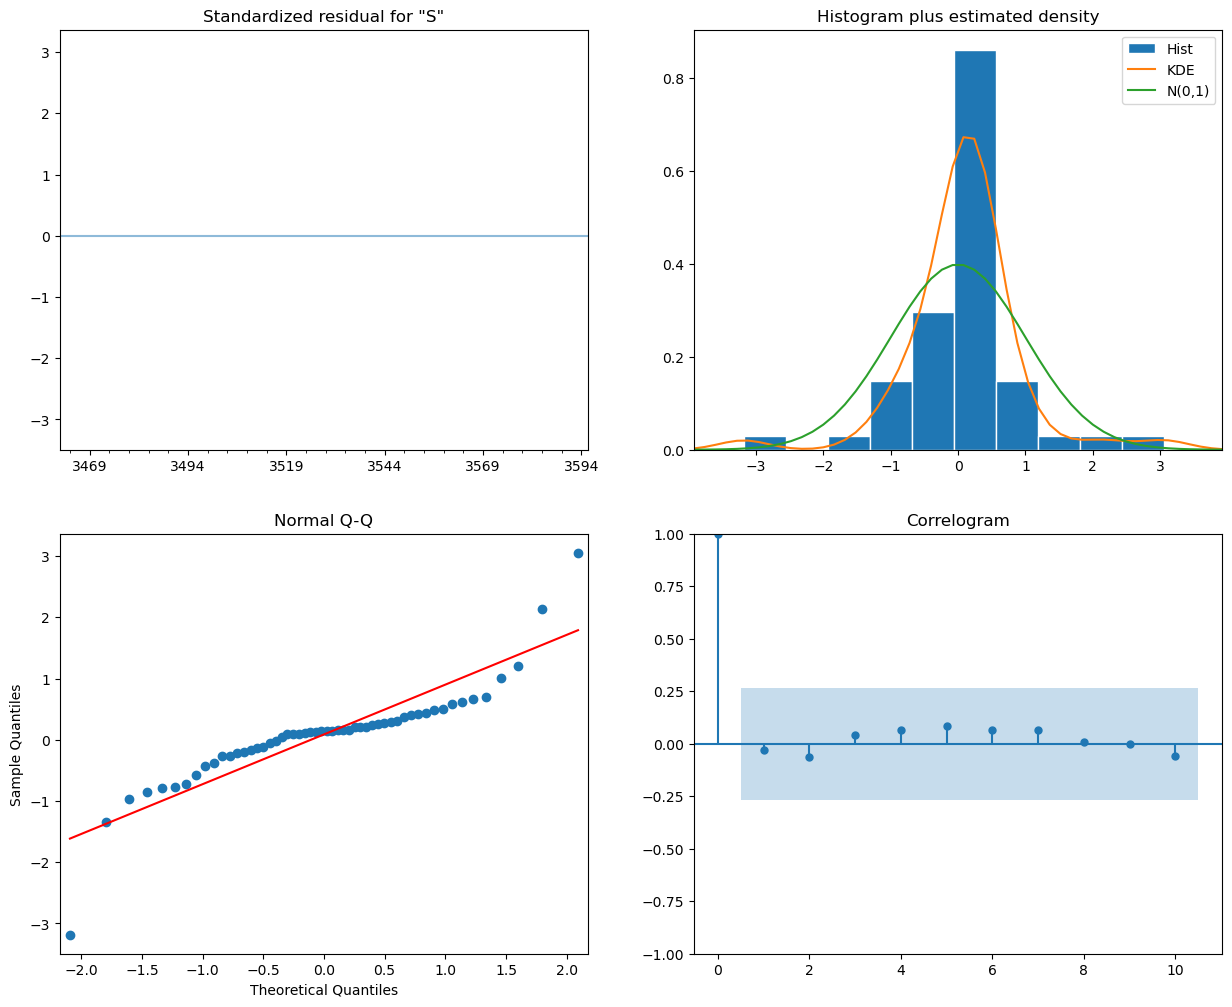

In [38]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [39]:
forecast_test_sarima=sarima_model.predict(start=54, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [40]:
sales_c['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

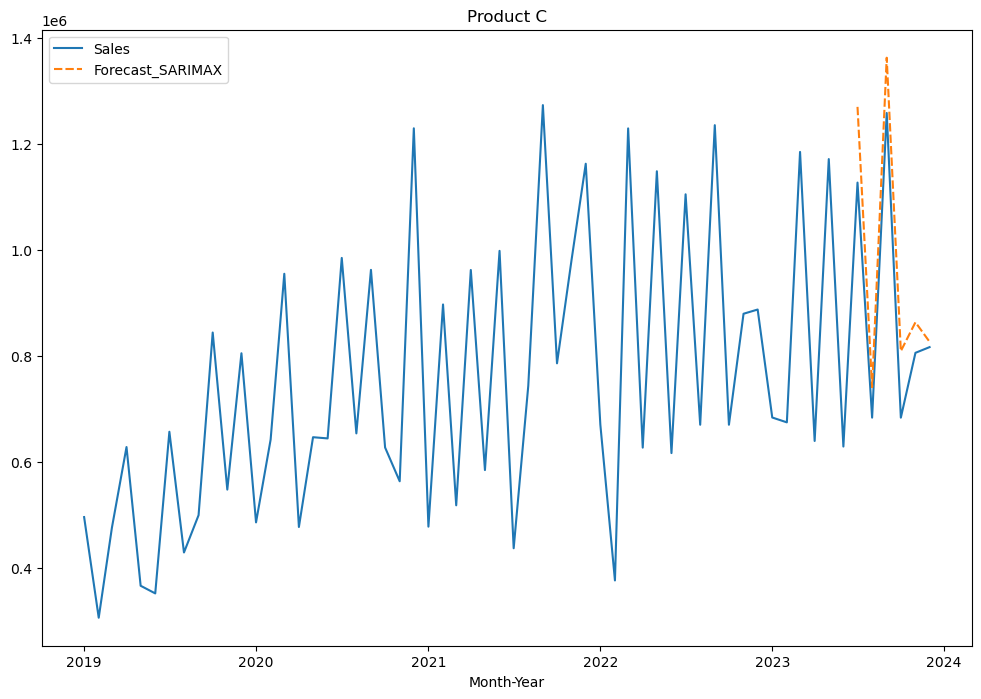

In [41]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMAX']])
plt.title('Product C')

In [42]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 82959.156
MAPE - SARIMAX: 0.093
MSE - SARIMAX: 8959171802.178
RMSE - SARIMAX: 94652.902


# AUTO-ARIMA

In [43]:
import pmdarima as pm

In [44]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1505.328, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1505.028, Time=0.04 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1506.693, Time=0.10 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1508.691, Time=0.50 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1507.117, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1507.022, Time=0.13 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1508.670, Time=0.16 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1510.668, Time=0.64 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1508.132, Time=0.17 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1508.759, Time=0.28 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1510.387, Time=0.71 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1512.319, Time=2.36 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1508.996, Time=0.68 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1510.652, Time=1.18 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1512.360, Time=3.13

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [45]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   54
Model:             SARIMAX(4, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -741.010
Date:                              Thu, 09 May 2024   AIC                           1496.021
Time:                                      16:26:57   BIC                           1509.944
Sample:                                  01-01-2019   HQIC                          1501.390
                                       - 06-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.927e+05   1.52e+05      2.576      0.010    9.39e+04    6.91e+05
ar.L1         -0.2774      0.168     -1.649      0.099      -0.607       0.052
ar.L2          0.2906      0.124      2.349      0.019       0.048       0.533
ar.L3          0.2323      0.125      1.856      0.064      -0.013       0.478
ar.L4          0.2236      0.156      1.435      0.151      -0.082       0.529
ma.S.L12       0.2204      0.166      1.326      0.185      -0.105       0.546
sigma2      4.645e+10      0.359   1.29e+11      0.000    4.64e+10    4.64e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.04
Prob(Q):                              1.00   Prob(JB):                         0.98
Heteroskedasticity (H):               1.24   Skew:                            -0.05
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.44e+26. Standard errors may be unstable.
"""

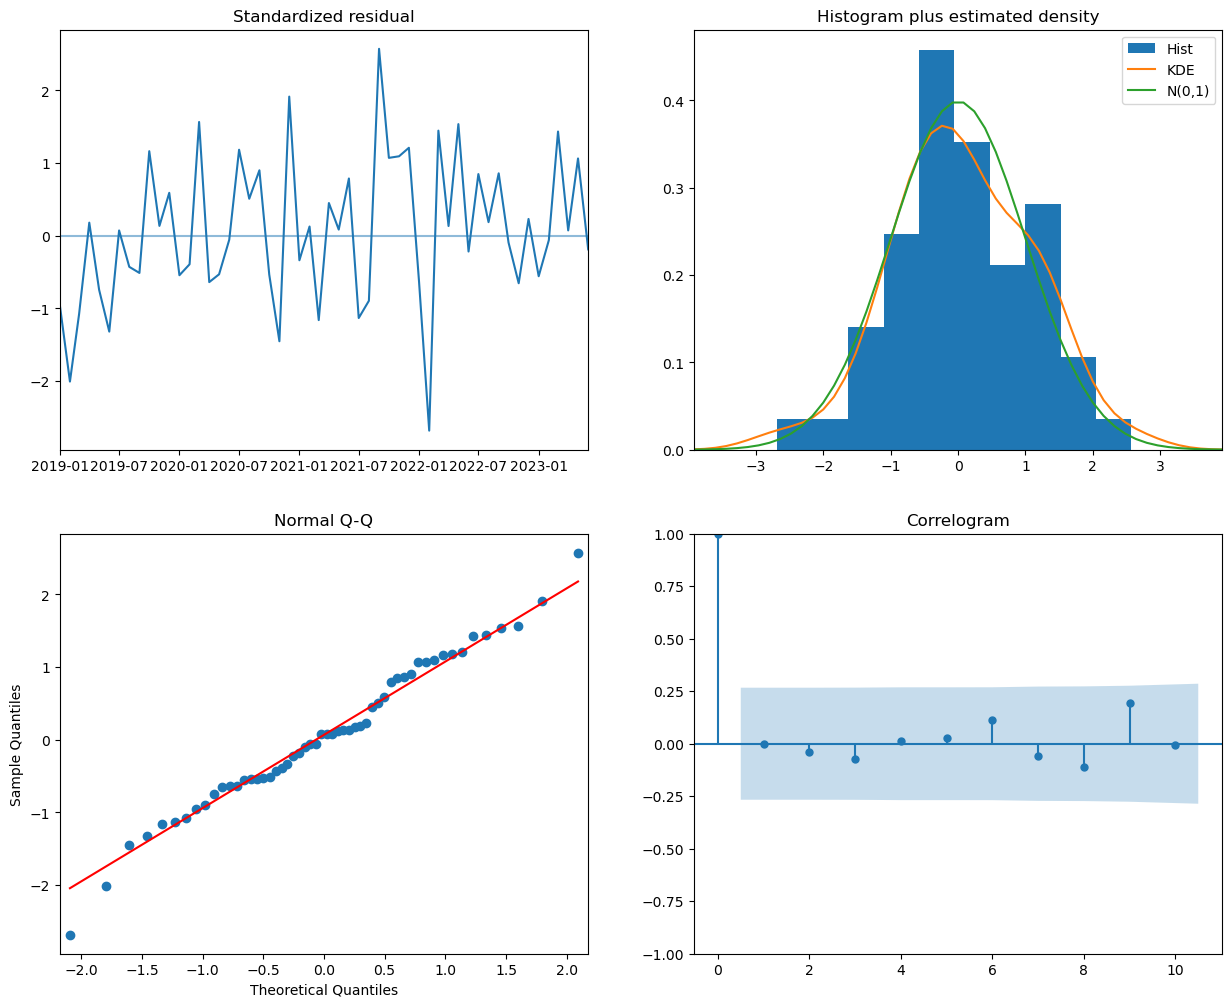

In [46]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [47]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

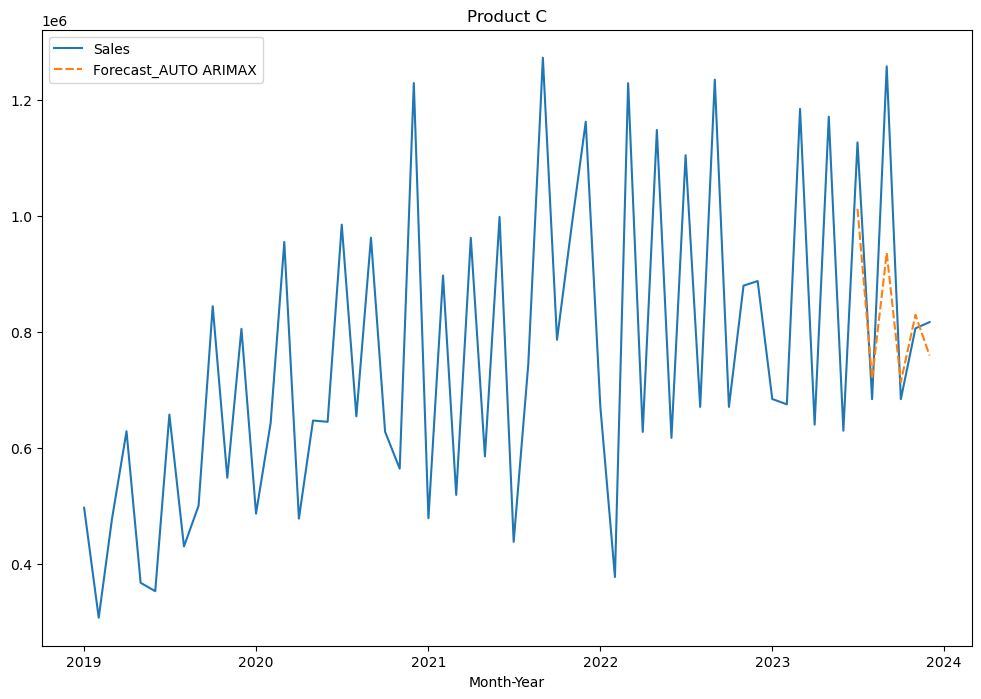

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product C')

In [49]:
mae_auto_arimax= round(mean_absolute_error(test['Sales'],forecast_test_auto),3)
mape_auto_arimax= round(mean_absolute_percentage_error(test['Sales'],forecast_test_auto),3)
mse_auto_arimax=round(mean_squared_error(test['Sales'],forecast_test_auto),3)
rmse_auto_arimax= round(np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto)),3)

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 97023.931
MAPE - AUTO ARIMAX: 0.092
MSE - AUTO ARIMAX: 20466972397.939
RMSE - AUTO ARIMAX: 143062.827


In [50]:
sales_c.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,684175,1198238,333991,NaN,NaN,NaN
2023-02-01,675038,1182240,329531,NaN,NaN,NaN
2023-03-01,1185258,2075812,578603,NaN,NaN,NaN
2023-04-01,639923,1120744,312389,NaN,NaN,NaN
2023-05-01,1171761,2052183,572015,NaN,NaN,NaN
2023-06-01,629400,1102308,307252,NaN,NaN,NaN
2023-07-01,1127413,1974516,550365,1.250770e+06,1.270253e+06,1.012720e+06
2023-08-01,683935,1197820,333874,7.581023e+05,7.413457e+05,7.189638e+05
2023-09-01,1258717,2204473,614464,1.251292e+06,1.362981e+06,9.367119e+05


In [51]:
sales_c.mean()

Sales                   7.599849e+05
Market Size             1.263304e+06
Marketing Expense       5.537495e+05
Forecast_ARIMAX         9.589247e+05
Forecast_SARIMAX        9.791585e+05
Forecast_AUTO ARIMAX    8.284521e+05
dtype: float64

In [52]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,84825.658759,0.106598,1.011229e+10,100559.891179
AUTO ARIMAX,97023.931000,0.092000,2.046697e+10,143062.827000
SEASONAL ARIMAX,82959.155598,0.093472,8.959172e+09,94652.901710


Text(0.5, 1.0, 'Product C')

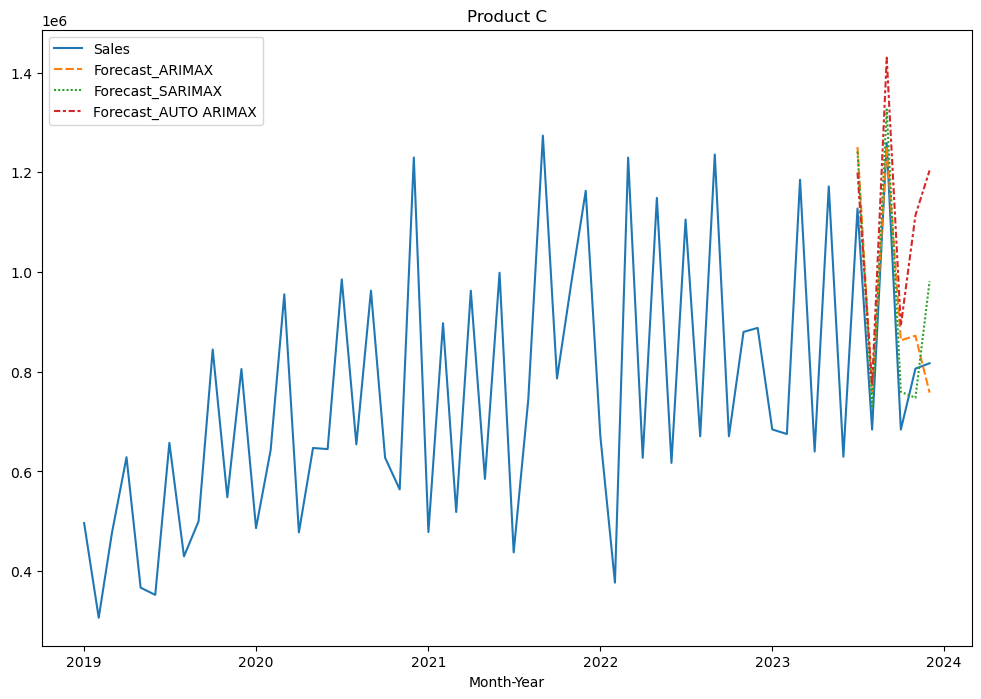

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX','Forecast_SARIMAX','Forecast_AUTO ARIMAX']])
plt.title('Product C')

# TESING

In [16]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1522.425, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1523.705, Time=0.06 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1525.704, Time=0.15 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1523.699, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1525.698, Time=0.18 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1527.689, Time=0.32 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1525.699, Time=0.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1527.699, Time=0.18 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1485.521, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1485.167, Time=0.07 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1486.936, Time=0.24 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1487.290, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [17]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -726.754
Date:                            Wed, 08 May 2024   AIC                           1463.508
Time:                                    18:51:42   BIC                           1473.359
Sample:                                01-01-2019   HQIC                          1467.296
                                     - 06-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.816e+04   1.19e+04      2.368      0.018    4848.790    5.15e+04
ar.L1         -0.6005      0.160     -3.763      0.000      -0.913      -0.288
ma.L1         -0.7394      0.121     -6.114      0.000      -0.976      -0.502
ma.S.L12       0.2219      0.199      1.113      0.266      -0.169       0.613
sigma2      5.206e+10      0.007   7.29e+12      0.000    5.21e+10    5.21e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.83
Prob(Q):                              0.93   Prob(JB):                         0.15
Heteroskedasticity (H):               1.86   Skew:                            -0.45
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.7e+28. Standard errors may be unstable.
"""

In [18]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

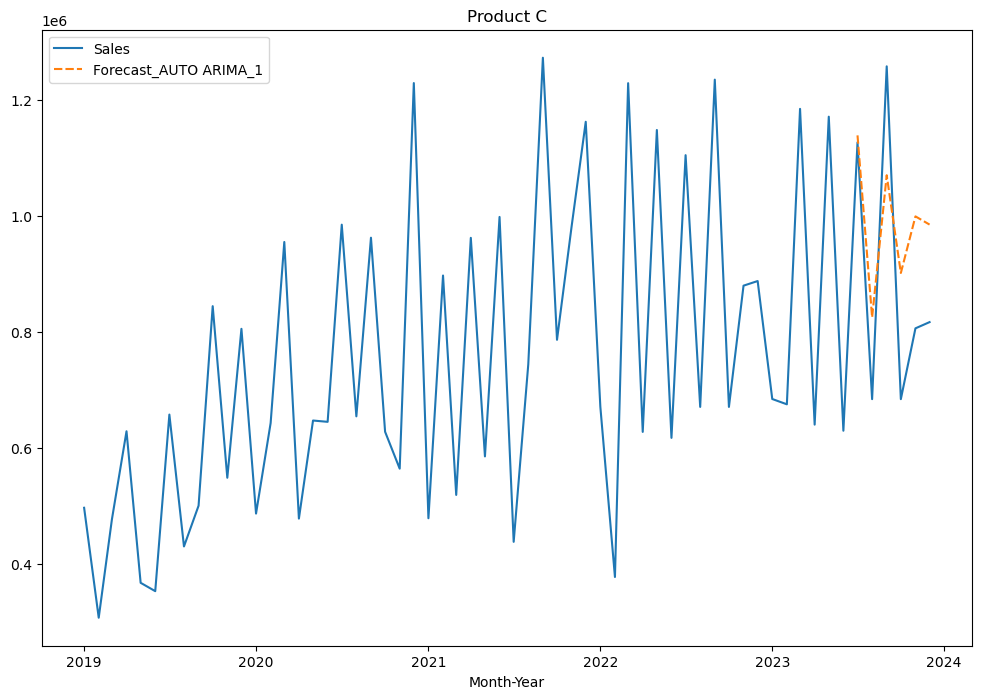

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [20]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 153487.22882252125
MAPE - AUTO ARIMA: 0.1885010746012817
MSE - AUTO ARIMA: 28109729669.278027
RMSE - AUTO ARIMA: 167659.56480105163
